In [17]:
%pylab inline
from lib import price_utils
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
reload(price_utils)
pd.options.display.float_format = '{:,.2f}'.format


month = '2016-09-01'

Populating the interactive namespace from numpy and matplotlib


# Top ccg-presentation savings

The SQL for this is abstracted into the `price_utils` library, q.v. for details.

We normalise prescriptions to their generic equivalent.  See [the README](https://github.com/ebmdatalab/price-per-dose/blob/master/README.md) for details.

The following is sorted by possible savings at the top decile. It tells us that CCG 13T  had the single biggest saving opportunity: to save £33,600 on its purchase of 8258 flu vaccines. It paid £9.92 per dose, when the lowest decile paid £5.85 per dose.

It is limited to the top 1000 CCG-presentation tuples.

In [2]:
top_1000_ccg = price_utils.get_savings(group_by='pct', month=month, limit=1000, sql_only=False)

In [18]:
top_1000_ccg.head()

,bnf_presentation,bnf_chemical,pct,category,avg_brand_count_per_practice,lowest_decile,quantity,price_per_dose,possible_savings,formulation_swap,num_pack_sizes,flag_imported,flag_broken_bulk,flag_non_bioequivalence,flag_special_containers
bnf_code,,,,,,,,,,,,,,,
1404000H0AAAFAF,Influenza_Vac Inact 0.5ml Pfs,Influenza,13T,NP8,1.14,5.92,25993,7.57,"47,185.65",NaN,3.00,nan,None,nan,1.00
1404000H0AAAFAF,Influenza_Vac Inact 0.5ml Pfs,Influenza,01H,NP8,1.10,5.92,35744,6.58,"26,395.80",NaN,3.00,nan,None,nan,1.00
0403040W0AAAEAE,Venlafaxine_Cap 150mg M/R,Venlafaxine,11J,C,1.21,0.38,43145,0.98,"24,669.05",Cap / Tab,3.00,nan,None,nan,nan
1404000H0AAAFAF,Influenza_Vac Inact 0.5ml Pfs,Influenza,06N,NP8,1.08,5.92,21795,6.82,"23,602.99",NaN,3.00,nan,None,nan,1.00
0601060D0AAA0A0,Glucose Blood Testing Reagents,Glucose Blood Testing Reagents,11X,NP8,14.05,0.25,594981,0.29,"23,364.66",NaN,nan,nan,None,nan,nan


How do the savings break down by Tariff Part VIII?

In [10]:
top_1000_ccg.to_csv("ccgs-%s.csv" % month)
print top_1000_ccg.groupby('category')['possible_savings'].sum().to_string(float_format='£{:,.2f}'.format)

category
A      £202,028.43 
C     £2,629,889.43
M      £787,242.56 
NP8   £2,923,970.01


What are the top chemicals?

In [13]:
print top_1000_ccg.groupby('bnf_chemical')['possible_savings'].sum().sort_values(ascending=False).head().to_string(float_format='£{:,.2f}'.format)


bnf_chemical
Influenza                        £1,379,060.40
Glucose Blood Testing Reagents    £853,190.71 
Fluticasone Propionate (Inh)      £714,340.28 
Venlafaxine                       £423,466.31 
Pregabalin                        £400,508.84 


## Grouped by CCG

The same data as above, but grouped by CCG rather than CCG-presentation pairs.

In [14]:
by_ccg = top_1000_ccg.groupby('pct')['possible_savings'] \
  .agg({'Count': 'count', 'Total savings': 'sum'}).sort_values('Total savings', ascending=False)
print by_ccg.head().to_string(float_format='£{:,.2f}'.format)

     Count  Total savings
pct                      
11J     36   £284,602.42
13P     31   £229,372.15
09G     28   £207,971.60
11N     24   £179,535.34
01H     21   £175,332.87


In [15]:
print "A total of £%.2f savings per month" % by_ccg['Total savings'].sum()

A total of £6543130.42 savings per month


## Just focusing on Rich's CCG

It could have saved £300k:

In [16]:
by_ccg.loc('savings_presentations_pct')['99P']

Count                20.000000
Total savings    161897.115308
Name: 99P, dtype: float64

The top 5 savings would have been:

In [20]:
reload(price_utils)
asd = price_utils.get_savings(for_entity='99P', month=month, limit=None)

In [24]:
asd.sort_values('possible_savings', ascending=False).head(5)

,bnf_presentation,bnf_chemical,pct,category,avg_brand_count_per_practice,lowest_decile,quantity,price_per_dose,possible_savings,formulation_swap,num_pack_sizes,flag_imported,flag_broken_bulk,flag_non_bioequivalence,flag_special_containers
bnf_code,,,,,,,,,,,,,,,
1404000H0AAAFAF,Influenza_Vac Inact 0.5ml Pfs,Influenza,99P,NP8,1.10,5.92,35736,6.48,"20,338.19",NaN,3.00,nan,None,nan,1.00
0302000K0AAAMAM,Budesonide/Formoterol Inh B/A 200/6(120D,Budesonide,99P,C,2.19,33.98,5042,36.58,"13,145.11",NaN,3.00,nan,None,nan,1.00
0601060D0AAA0A0,Glucose Blood Testing Reagents,Glucose Blood Testing Reagents,99P,NP8,11.61,0.24,931673,0.25,"12,942.32",NaN,nan,nan,None,nan,nan
0408010AEAAAGAG,Pregabalin_Cap 300mg,Pregabalin,99P,C,2.13,0.99,93796,1.12,"11,986.01",NaN,3.00,nan,None,nan,nan
0408010AEAAAEAE,Pregabalin_Cap 150mg,Pregabalin,99P,C,2.21,0.98,89637,1.11,"11,896.73",NaN,3.00,nan,None,nan,nan


In [25]:
# Save it to a cSV

asd.sort_values('possible_savings', ascending=False).to_csv("99P-full-%s.csv" % month)

# Same thing for practices

In [26]:
reload(price_utils)
top_1000_practice = price_utils.get_savings(group_by='practice',month=month, limit=1000)

In [27]:
top_1000_practice.head(10)

,bnf_presentation,bnf_chemical,practice,pct,category,avg_brand_count_per_practice,lowest_decile,quantity,price_per_dose,possible_savings,formulation_swap,num_pack_sizes,flag_imported,flag_broken_bulk,flag_non_bioequivalence,flag_special_containers
bnf_code,,,,,,,,,,,,,,,,
0208010L0AAAIAI,"Dalteparin Sod_Inj 25,000u/ml 0.72ml Pfs",Dalteparin Sodium,K84055,10Q,NP8,1,10.16,110,137.41,"13,996.85",NaN,3.00,nan,None,nan,nan
0908010P0AAAEAE,Sod Phenylbut_Liq Spec 1.25g/5ml,Sodium Phenylbutyrate,J82034,11A,NP8,1,1.09,2500,5.56,"11,187.72",NaN,3.00,nan,None,nan,nan
0908010S0AAACAC,Trientine Dihydroch_Cap 300mg,Trientine Dihydrochloride,E83638,07M,NP8,1,22.91,400,49.99,"10,831.68",NaN,nan,nan,None,nan,nan
0401010ADAABPBP,Melatonin_Tab 3mg,Melatonin,H82016,09G,NP8,2,0.75,552,19.26,"10,219.03",Tab / Cap,nan,nan,None,nan,nan
0908010S0AAACAC,Trientine Dihydroch_Cap 300mg,Trientine Dihydrochloride,F81069,06T,NP8,1,22.91,200,65.74,"8,565.84",NaN,nan,nan,None,nan,nan
0902012L0AABRBR,Sod Chlor_Liq Spec 292.5mg/5ml,Sodium Chloride,B83602,02N,NP8,1,0.06,8000,1.10,"8,309.15",Liq Spec / Oral Soln,nan,nan,None,nan,nan
1404000H0AAAFAF,Influenza_Vac Inact 0.5ml Pfs,Influenza,H82052,09H,NP8,1,5.92,1771,9.94,"7,119.42",NaN,3.00,nan,None,nan,1.00
0407010Q0AAAAAA,Co-Proxamol_Tab 32.5mg/325mg,Co-Proxamol (Dextroprop HCl/Paracet),M91011,05Y,NP8,1,0.70,3672,2.55,"6,780.45",NaN,3.00,nan,None,nan,nan
0208010L0AAAHAH,"Dalteparin Sod_Inj 25,000u/ml 0.6ml Pfs",Dalteparin Sodium,C82031,04C,NP8,1,8.47,60,115.16,"6,401.77",NaN,3.00,nan,None,nan,nan


### What savings appear only once in this list?

In [33]:
grouped = top_1000_practice.groupby('bnf_presentation')
singletons = grouped.filter(lambda x: len(x) == 1).sort_values('possible_savings', ascending=False)
print "There are %s singletons in the practice-presentation savings list, for example:" % len(singletons)
singletons.head(10)

There are 113 singletons in the practice-presentation savings list, for example:


,bnf_presentation,bnf_chemical,practice,pct,category,avg_brand_count_per_practice,lowest_decile,quantity,price_per_dose,possible_savings,formulation_swap,num_pack_sizes,flag_imported,flag_broken_bulk,flag_non_bioequivalence,flag_special_containers
bnf_code,,,,,,,,,,,,,,,,
0902012L0AABXBX,Sod Chlor_Liq Spec 585mg/5ml,Sodium Chloride,G82228,09E,NP8,1,0.63,600,7.57,"4,164.02",NaN,3.00,nan,None,nan,nan
1202020L0AACDCD,Sod Chlor_Neb Soln 7% 5ml Btl,Sodium Chloride,F84006,08M,NP8,1,6.09,30,137.77,"3,950.41",NaN,3.00,nan,None,nan,nan
091102000AABDBD,Ubidecarenone_Oral Dps 5mg/ml,Other Enzyme Preps 0911020,B86003,03C,NP8,1,1.17,1000,4.93,"3,756.90",NaN,nan,nan,None,nan,nan
0908010N0AAAIAI,Sod Benz_Liq Spec 1g/5ml,Sodium Benzoate,C88048,03N,NP8,1,0.68,2000,2.54,"3,713.29",NaN,3.00,nan,None,nan,nan
0404000L0AAAYAY,Dexamfet Sulf/Amfet_Cap 15mg/15mg M/R,Dexamfetamine Sulfate,F83678,08H,NP8,1,11.28,180,31.84,"3,700.86",NaN,3.00,1.00,None,nan,nan
0101012B0AABSBS,Sod Bicarb_Liq Spec 50mg/5ml,Sodium Bicarbonate,Y00243,06N,NP8,1,0.01,2835,1.24,"3,501.45",Liq Spec / Oral Soln,3.00,nan,None,nan,nan
0309010L0AAAHAH,Dextrometh Hydrob_Oral Susp 30mg/5ml,Dextromethorphan Hydrobromide,G82085,99J,NP8,1,0.76,1780,2.72,"3,483.61",NaN,3.00,nan,None,nan,nan
0107010S0AAABAB,Sucralfate_Enem 2g In 20ml,Sucralfate,E85681,07Y,NP8,1,11.71,20,180.00,"3,365.81",NaN,3.00,nan,None,nan,nan
0902021S0AAAZAZ,Sod Chlor_I/V Inf 0.9% 1L,Sodium Chloride,A85005,13T,NP8,2,1.67,70,47.79,"3,228.16",I/V Inf / Blad Irrig,3.00,nan,None,nan,1.00


In [35]:

top_1000_practice.to_csv("practices-%s.csv" % month)

# What is the distribution of the easiest cost savings?

For each practice, compute and sum its top three savings, then plot these in a histogram.

In [61]:
reload(price_utils)
top_10 = price_utils.top_savings_per_entity(top_n=10, entity='practice')
top_10.to_csv("each_practice_top_10_savings-%s.csv" % month)

In [37]:
reload(price_utils)
top_1 = price_utils.top_savings_per_entity(top_n=1, entity='practice', summed=False)
top_1.to_csv("top_saving_for_each_practice_%s.csv" % month)

In [60]:
top_10.describe()

,top_savings_sum
count,7637.000000
mean,2002.218267
std,1363.336244
min,0.000000
25%,1079.671028
50%,1722.737374
75%,2600.779768
max,17809.622578


In [67]:
top_10.sort_values('top_savings_sum', ascending=False).head(5)

,practice,top_savings_sum
4876,K84055,17809.622578
714,B83602,17773.665735
4382,J82094,16966.668402
4334,J82034,13671.041531
5798,M85063,13549.065237


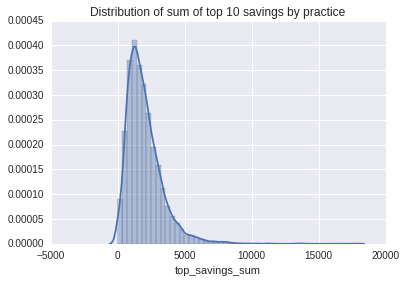

In [39]:
sns.distplot(top_10.top_savings_sum)
plt.title("Distribution of sum of top 10 savings by practice")
plt.show()

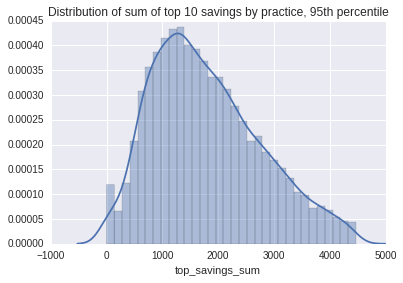

In [40]:
asd = top_10[top_10.top_savings_sum < top_10.top_savings_sum.quantile(.95)]
g = sns.distplot(asd.top_savings_sum)
plt.title("Distribution of sum of top 10 savings by practice, 95th percentile")
plt.show()

## Same thing, by CCG

In [41]:
reload(price_utils)
top_10_pct = price_utils.top_savings_per_entity(top_n=10, entity='pct')

In [42]:
top_10_pct.describe()

,top_savings_sum
count,213.00
mean,"40,915.60"
std,"22,779.51"
min,42.77
25%,"25,620.72"
50%,"36,276.98"
75%,"48,537.48"
max,"142,077.13"


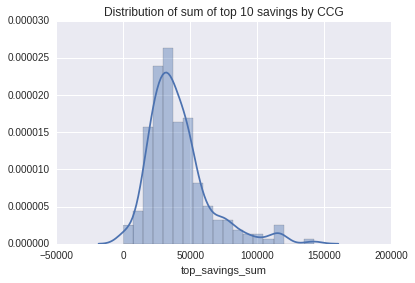

In [43]:
sns.distplot(top_10_pct.top_savings_sum)
plt.title("Distribution of sum of top 10 savings by CCG")
plt.show()

In [44]:
reload(price_utils)
top_1000_product = price_utils.get_savings(group_by='product', month=month, limit=1000)


In [45]:
top_1000_product.head(5)


,bnf_presentation,bnf_chemical,category,avg_brand_count_per_practice,lowest_decile,quantity,price_per_dose,possible_savings,formulation_swap,num_pack_sizes,flag_imported,flag_broken_bulk,flag_non_bioequivalence,flag_special_containers
bnf_code,,,,,,,,,,,,,,
1404000H0AAAFAF,Influenza_Vac Inact 0.5ml Pfs,Influenza,NP8,1.10,5.92,2055110,6.62,"1,522,419.70",NaN,3.00,nan,None,nan,1.00
0601060D0AAA0A0,Glucose Blood Testing Reagents,Glucose Blood Testing Reagents,NP8,12.05,0.25,57333666,0.26,"1,043,779.81",NaN,nan,nan,None,nan,nan
0302000N0AABGBG,Fluticasone/Salmeterol_Inh 250/25mcg120D,Fluticasone Propionate (Inh),C,2.06,52.05,158950,56.59,"809,566.81",NaN,3.00,nan,None,nan,1.00
0403040W0AAAEAE,Venlafaxine_Cap 150mg M/R,Venlafaxine,C,1.49,0.38,2668261,0.65,"639,892.88",Cap / Tab,3.00,nan,None,nan,nan
0302000K0AAAMAM,Budesonide/Formoterol Inh B/A 200/6(120D,Budesonide,C,2.20,33.98,225338,36.74,"627,801.21",NaN,3.00,nan,None,nan,1.00


## What if every practice enacted all its top 3 savings?

The following shows that there would be £11m of savings, including: £3.4m on blood test strips, £1.1m on vaccines, £1.2m on Fluticasone/Salmeterol inhalers, and £600k on Pregabalin

In [46]:
reload(price_utils)
# A list of all the generic presentations in the top three savings for each practice
df = price_utils.all_presentations_in_per_entity_top_n(top_n=3, entity='practice', month='2016-09-01')

In [47]:
# Total savings if each practice enacted its top three savings
df.top_savings_sum.sum()

8005429.8248444144

In [48]:
# The top savings by presentation if each practice enacted its top three savings
by_presentation = df.groupby('presentation').top_savings_sum.sum().sort_values(inplace=False, ascending=False)
by_presentation.head()

presentation
Influenza_Vac Inact 0.5ml Pfs              1,248,087.89
Glucose Blood Testing Reagents               653,892.81
Fluticasone/Salmeterol_Inh 250/25mcg120D     326,968.99
Co-Proxamol_Tab 32.5mg/325mg                 218,023.28
Lamotrigine_Tab 100mg                        204,093.73
Name: top_savings_sum, dtype: float64

In [49]:
# The top savings by chemical if each practice enacted its top three savings
by_subpara = df.groupby('chemical').top_savings_sum.sum().sort_values(inplace=False, ascending=False)
by_subpara.head(10)

chemical
Influenza                              1,248,087.89
Glucose Blood Testing Reagents           653,892.81
Levetiracetam                            467,345.08
Lamotrigine                              400,015.67
Fluticasone Propionate (Inh)             357,933.49
Colecalciferol                           272,246.74
Venlafaxine                              255,845.48
Co-Proxamol (Dextroprop HCl/Paracet)     218,286.56
Melatonin                                195,446.73
Quetiapine                               179,358.28
Name: top_savings_sum, dtype: float64

### And just its top 1 saving?
£4 million of savings, mostly on blood testing strips.

In [50]:
reload(price_utils)
# A list of all the generic presentations in the top one savings for each practice
df2 = price_utils.all_presentations_in_per_entity_top_n(top_n=1, entity='practice', month='2016-09-01')

In [51]:
df2.top_savings_sum.sum()

4053973.1634699339

In [52]:
# The top savings by chemical if each practice enacted its top saving
by_chemical2 = df2.groupby('chemical').top_savings_sum.sum().sort_values(inplace=False, ascending=False)
by_chemical2.head(10)

chemical
Influenza                              872,999.58
Glucose Blood Testing Reagents         286,237.36
Levetiracetam                          167,526.91
Colecalciferol                         161,614.67
Co-Proxamol (Dextroprop HCl/Paracet)   154,986.86
Lamotrigine                            151,070.72
Dalteparin Sodium                      140,174.34
Melatonin                              106,998.08
Fluticasone Propionate (Inh)            99,458.51
Venlafaxine                             83,735.83
Name: top_savings_sum, dtype: float64

### What are unusual top savings?

# What are the actions for the top drugs?

1. Switch from *Aviva testing strips (Roche Diabetes Care Ltd)* or *Mobile cassette (Roche Diabetes Care Ltd)* or *Contour Next testing strips (Bayer Diagnostics Manufacturing Ltd)* or *FreeStyle Optium testing strips (Abbott Laboratories Ltd)* to *GlucoRx Nexus testing strips (GlucoRx Ltd)* or *WaveSense JAZZ testing strips (AgaMatrix Europe Ltd)*
2. Switch from *Seretide 250 Evohaler* to *Sirdupla 25micrograms/dose / 250micrograms/dose inhaler* 
3. Switch from *Fluarix Tetra vaccine suspension for injection 0.5ml pre-filled syringes* to *Influvac Sub-unit vaccine suspension for injection 0.5ml pre-filled syringes*
4. Switch from *Lyrica 75mg capsules* to *Alzain 75mg capsules*
5. Switch from *Symbicort 200/6 Turbohaler* to *DuoResp Spiromax 160micrograms/dose / 4.5micrograms/dose dry powder inhaler*

## What reasons are there for not switching?

There are a number of costs relating to switching, including:

* With device-based drugs, patients require training in new devices
* Patients are reluctant to accept change when they perceive a certain brand as working
* GPs are reluctant to accept change when they see it as continuous background pressure (e.g. moving targets, ever-cheaper products becoming available)
* (Possibly unfounded) views among HCPs that alternatives are not clinincally equivalent or at least comparable (e.g. tetravalent vs trivalent vaccines; different glucose meters)
* Drugs in category M which are not yet licenced for all uses (e.g. Pregabalin)


## What if practices only enacted cost savings that were at least £1000?

There would still be £3m of savings. Plotting total savings against a minimum threshold shows something close to an exponential dropoff (the closest fit is a 4PL curve with the inflection point relatively close to zero: `y = 2694457 + 35665420*e^(-0.003723744*x)`)

In [53]:
d = {}
for threshold in [10, 110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]:
    d[threshold] = price_utils.cost_savings_at_minimum_for_practice(threshold, month='2016-09-01').top_savings_sum.sum()
d

{10: 34660180.154420972,
 110: 17036379.520410381,
 210: 10099491.686985292,
 310: 6805120.1687839311,
 410: 4916021.642091901,
 510: 3760646.821409048,
 610: 2969136.2199055143,
 710: 2398577.0791196171,
 810: 2011993.3460341,
 910: 1730405.6307992071,
 1010: 1520966.8835880314}

In [69]:
print price_utils.get_savings(group_by='pct', limit=None, sql_only=True, month=month, order_by_savings=False, namespace='hscic', prescribing_table='prescribing')

SELECT
  bnf.presentation,
  bnf.chemical,
  savings.presentations.pct AS pct,
  savings.generic_presentation AS generic_presentation,
  savings.category AS category,
  savings.avg_brand_count_per_practice AS avg_brand_count_per_practice,
  savings.deciles.lowest_decile AS lowest_decile,
  savings.quantity AS quantity,
  savings.price_per_dose AS price_per_dose,
  savings.possible_savings AS possible_savings
FROM (
  SELECT
      presentations.pct, 
      generic_presentation,
      deciles.lowest_decile,
      AVG(brand_count) AS avg_brand_count_per_practice,
      MAX(category) AS category,
      SUM(quantity) AS quantity,
      AVG(price_per_dose) AS price_per_dose,
      SUM(possible_savings) AS possible_savings
    FROM (
    -- Always select per-practice initially, so we can apply "diode"
    -- to exclude negative cost savings
    SELECT
      presentations.practice,
      presentations.pct,
      presentations.generic_presentation AS generic_presentation,
      COUNT(DISTINCT b

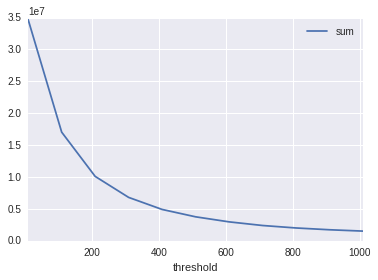

In [54]:
pd.options.display.float_format = None
asd = pd.DataFrame(d.items())
asd.columns = ['threshold', 'sum']
s = asd.sort_values('threshold')
s.plot(x='threshold', y='sum')

## Visualising distributions of drug prices

### 1. Drugs with the greatest saving potential

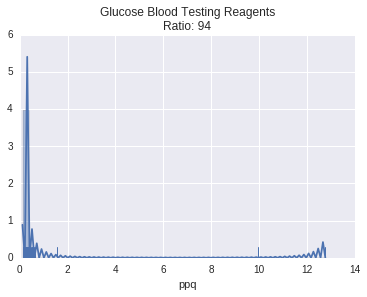

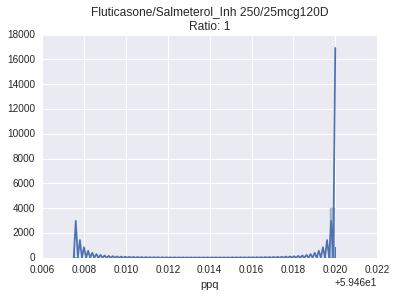

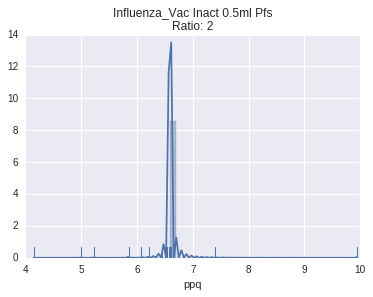

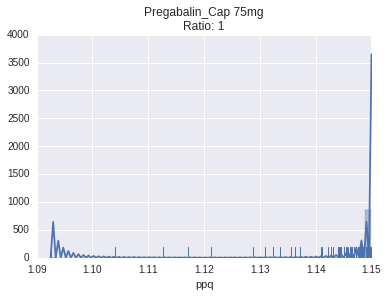

/usr/local/lib/python2.7/dist-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/usr/local/lib/python2.7/dist-packages/statsmodels/nonparametric/kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


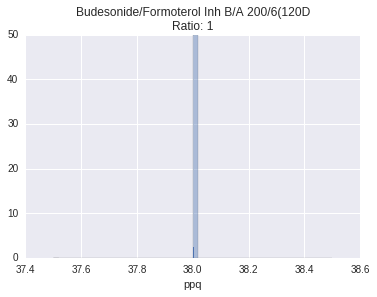

In [56]:
subjects = """0601060D0%	Glucose Blood Testing Reagents
0302000N0AABGBG	Fluticasone/Salmeterol_Inh 250/25mcg120D
1404000H0AAAFAF	Influenza_Vac Inact 0.5ml Pfs
0408010AEAAACAC	Pregabalin_Cap 75mg
0302000K0AAAMAM	Budesonide/Formoterol Inh B/A 200/6(120D"""

for subject in subjects.split("\n"):
    code, title = subject.split("\t", 1)
    sql = """  SELECT
        *
      FROM
        ebmdatalab.hscic.prescribing_with_merged_codes_2016_09_01
      WHERE
        bnf_code LIKE '%s'""" % code
    df = pd.io.gbq.read_gbq(
        sql, project_id="ebmdatalab", verbose=False, dialect='standard')
    df['ppq'] = df['net_cost'] / df['quantity']
    df = df.sort_values('ppq')
    cheapest = float(df[['quantity', 'net_cost', 'ppq']].head(1)['ppq'].iloc[0])
    expensivest = float(df[['quantity', 'net_cost', 'ppq']].tail(1)['ppq'].iloc[0])
    ratio = int(expensivest / cheapest)
    sns.distplot(df['ppq'], rug=True)
    sns.plt.title("%s\nRatio: %s" % (title, ratio))
    sns.plt.show()


### 2. Some branded drugs that show significant variation 

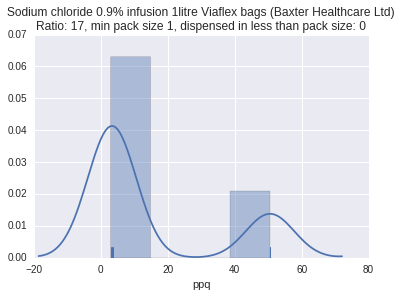

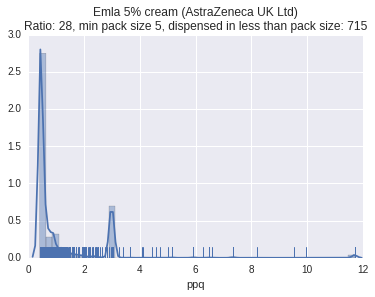

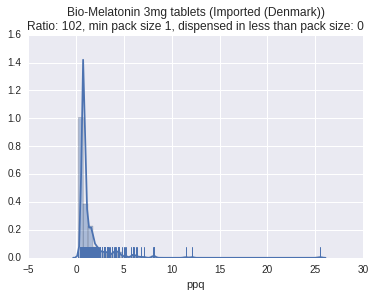

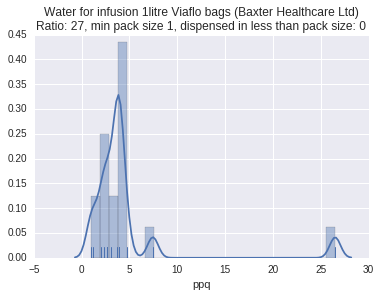

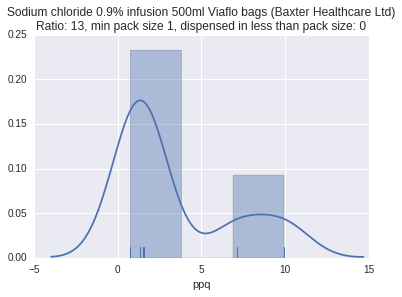

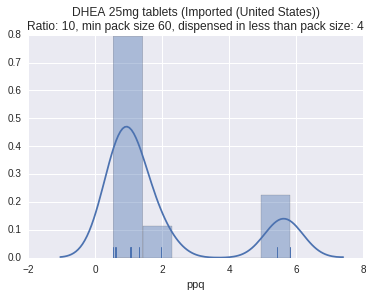

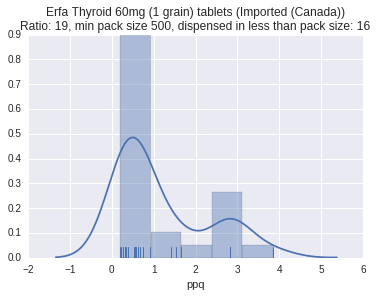

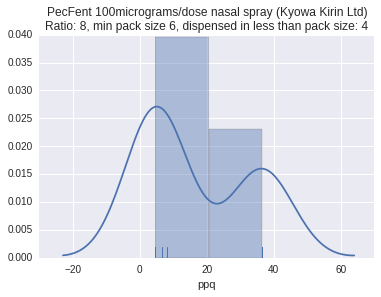

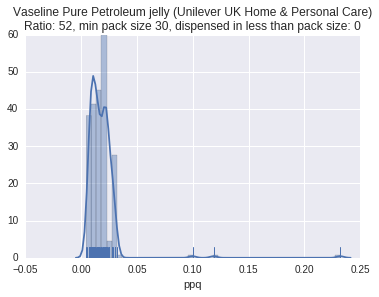

In [57]:
subjects = """0902021S0BBAJAZ	Sodium chloride 0.9% infusion 1litre Viaflex bags (Baxter Healthcare Ltd)
1502010J0BEAABY	Emla 5% cream (AstraZeneca UK Ltd)
0401010ADBCBZBP	Bio-Melatonin 3mg tablets (Imported (Denmark))
0902021X0BGACAZ	Water for infusion 1litre Viaflo bags (Baxter Healthcare Ltd)
0902021S0BBAXAY	Sodium chloride 0.9% infusion 500ml Viaflo bags (Baxter Healthcare Ltd)
0604030Q0BBAFAI	DHEA 25mg tablets (Imported (United States))
0602010Z0BEABAJ	Erfa Thyroid 60mg (1 grain) tablets (Imported (Canada))
0407020A0BPAABN	PecFent 100micrograms/dose nasal spray (Kyowa Kirin Ltd)
1302010N0BDAAAA	Vaseline Pure Petroleum jelly (Unilever UK Home & Personal Care)"""

for subject in subjects.split("\n"):
    code, title = subject.split("\t", 1)
    sql = """  SELECT
        *
      FROM
        ebmdatalab.hscic.prescribing_with_merged_codes_2016_09_01
      WHERE
        bnf_code = '%s'""" % code
    df = pd.io.gbq.read_gbq(
        sql, project_id="ebmdatalab", verbose=False, dialect='standard')
    df['ppq'] = df['net_cost'] / df['quantity']
    df = df.sort_values('ppq')
    cheapest = float(df[['quantity', 'net_cost', 'ppq']].head(1)['ppq'].iloc[0])
    expensivest = float(df[['quantity', 'net_cost', 'ppq']].tail(1)['ppq'].iloc[0])
    ratio = int(expensivest / cheapest)

    sql = "select MIN(VMPP.QTYVAL) from dmd_product inner join AMP on dmd_product.DMDID = AMP.APID  inner join VMPP on AMP.VPID = VMPP.VPID where BNF_CODE = '%s'" % code
    min_pack_size = int(pd.read_sql_query(sql, con).iloc[0])
    dispensed_in_packs = len(df[df.quantity < min_pack_size])
    sns.distplot(df['ppq'], rug=True)
    sns.plt.title("%s\nRatio: %s, min pack size %s, dispensed in less than pack size: %s" % (title, ratio, min_pack_size, dispensed_in_packs))
    sns.plt.show()


### 3. Some NP8 drugs identified in our "scalping" exercise

See [this notebook](https://github.com/ebmdatalab/price-per-dose/blob/master/How%20would%20I%20scalp%20the%20NHS%3F.ipynb) for background

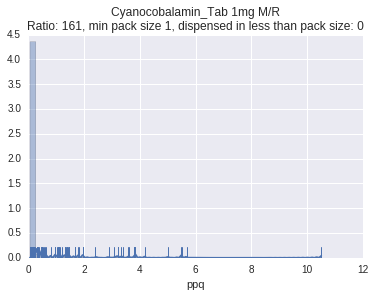

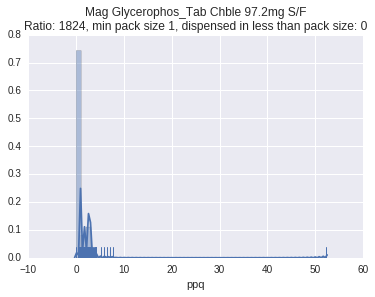

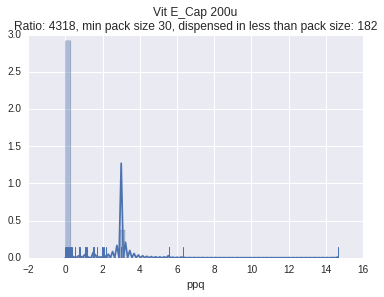

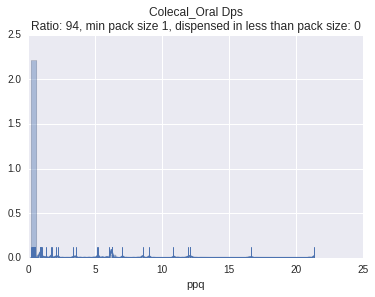

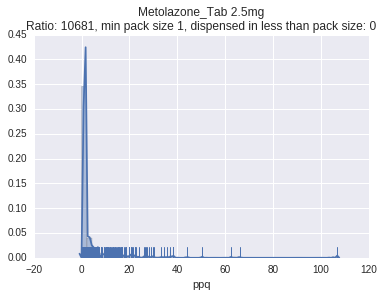

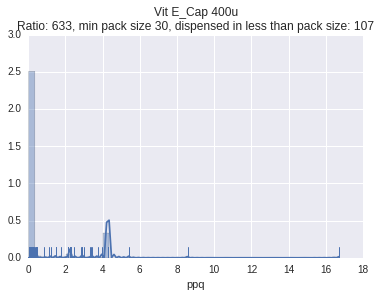

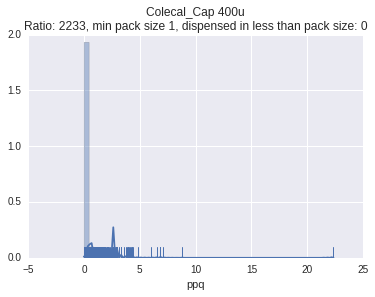

IndexError: single positional indexer is out-of-bounds

In [58]:
subjects = """0901020D0AAAHAH	Cyanocobalamin_Tab 1mg M/R
0905013G0AAAYAY	Mag Glycerophos_Tab Chble 97.2mg S/F
0906050P0AAABAB	Vit E_Cap 200u
0906040G0AABTBT	Colecal_Oral Dps
0202010V0AAANAN	Metolazone_Tab 2.5mg
0906050P0AAAFAF	Vit E_Cap 400u
0906040G0AABIBI	Colecal_Cap 400u
0906040G0AACRCR	Colecal_Tab 20 000u
0906040G0AABRBR	Colecal_Tab 400u
0906024N0AAAGAG	Pyridox HCl_Tab 10mg
0906040G0AABHBH	Colecal_Cap 1 000u
0407010Q0AAAAAA	Co-Proxamol_Tab 32.5mg/325mg"""

for subject in subjects.split("\n"):
    code, title = subject.split("\t", 1)
    sql = """  SELECT
        *
      FROM
        ebmdatalab.hscic.prescribing_with_merged_codes_2016_09_01
      WHERE
        bnf_code = '%s'""" % code
    df = pd.io.gbq.read_gbq(
        sql, project_id="ebmdatalab", verbose=False, dialect='standard')
    df['ppq'] = df['net_cost'] / df['quantity']
    df = df.sort_values('ppq')
    cheapest = float(df[['quantity', 'net_cost', 'ppq']].head(1)['ppq'].iloc[0])
    expensivest = float(df[['quantity', 'net_cost', 'ppq']].tail(1)['ppq'].iloc[0])
    ratio = int(expensivest / cheapest)

    sql = "select MIN(VMPP.QTYVAL) from dmd_product inner join AMP on dmd_product.DMDID = AMP.APID  inner join VMPP on AMP.VPID = VMPP.VPID where BNF_CODE = '%s'" % code
    min_pack_size = int(pd.read_sql_query(sql, con).iloc[0])
    dispensed_in_packs = len(df[df.quantity < min_pack_size])
    sns.distplot(df['ppq'], rug=True)
    sns.plt.title("%s\nRatio: %s, min pack size %s, dispensed in less than pack size: %s" % (title, ratio, min_pack_size, dispensed_in_packs))
    sns.plt.show()